# Analysis 
Further work: see only the best performing models and see if these have effects. (Top N of each)

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
results = pd.read_csv("./data/model_results.csv", index_col = 0)
results

,Recon Loss,Learning Rate,DetEval,batch size,hidden size,latent size,fixed variance,dropout rate,L2 weight,noise layer std,optimizer,nonlinearity,residual user info,RMSE
0,MSE,0.00005,False,128.0,4096.0,512.0,0.0,0.5,0.00001,0.1,Adam,LeakyRelu,True,1.217142
1,MSE,0.00001,False,32.0,4096.0,1024.0,0.3,0.0,0.00000,0.5,RMSProp,Tanh,True,0.969229
2,MSE,0.00005,True,32.0,2048.0,2048.0,0.5,0.1,0.00000,0.1,Adam,Tanh,True,0.793748
3,Likelihood,0.00005,True,64.0,1024.0,512.0,0.1,0.3,0.00000,0.0,Adagrad,Relu,True,1.728256
4,MSE,0.00010,True,64.0,2048.0,512.0,0.5,0.3,0.00010,0.1,Adam,Relu,True,1.214385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Likelihood,0.00010,False,32.0,1024.0,512.0,0.3,0.1,0.00000,0.3,Adagrad,LeakyRelu,False,1.328223
0,MSE,0.00001,False,64.0,4096.0,512.0,0.5,0.5,0.00000,0.1,RMSProp,Sigmoid,False,1.224879
0,MSE,0.00010,False,128.0,2048.0,1024.0,0.5,0.3,0.00000,0.3,Adagrad,Sigmoid,True,1.262006
0,MSE,0.00010,False,128.0,1024.0,2048.0,0.0,0.5,0.00000,0.5,Adagrad,Tanh,False,1.263238


# Question 1: Does deterministic evaluation help?

The data suggests that it has a negligible effect on the outcome of the model. 

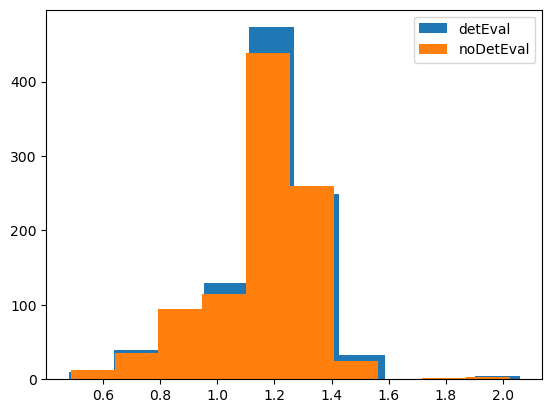

In [121]:
detEval = results[results.DetEval == True].RMSE
noDetEval = results[results.DetEval == False].RMSE
plt.hist(detEval)
plt.hist(noDetEval)
plt.legend(['detEval', 'noDetEval'])

In [122]:
print("The mean of detEval = " + str(detEval.mean()))
print("The mean of noDetEval = " + str(noDetEval.mean()))
print("The median of detEval = " + str(detEval.median()))
print("The median of noDetEval = " + str(noDetEval.median()))
print("The std of detEval = " + str(detEval.std()))
print("The std of noDetEval = " + str(noDetEval.std()))


The mean of detEval = 1.1832176750351033
The mean of noDetEval = 1.15739278855726
The median of detEval = 1.200951099395752
The median of noDetEval = 1.1892530918121338
The std of detEval = 0.18039155953428682
The std of noDetEval = 0.18158980398857513


# Question 2: Does Fixed variance help?
It appears that Fixed Variance had a negligible effect as well. However, this could also be taken as: the extra hyperparameters are not worth it and better spent elsewhere. 

Check each value of fixed var and see if any stand out

[0.5, 2.0, 0.5, 2.0, 0.5, 2.0, 0.5, 2.0]

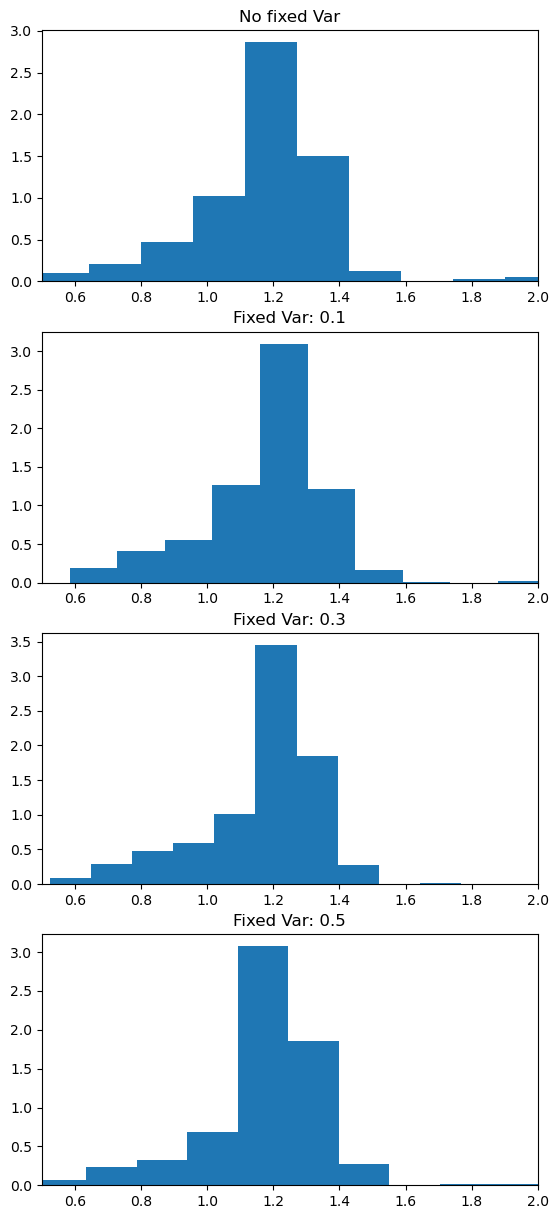

In [123]:
noFixedVar = results[results["fixed variance"] == 0.0].RMSE
fixedVar1 = results[results["fixed variance"] == 0.1].RMSE
fixedVar3 = results[results["fixed variance"] == 0.3].RMSE
fixedVar5 = results[results["fixed variance"] == 0.5].RMSE
fig, ax = plt.subplots(4)
fig.set_figheight(15)

ax[0].hist(noFixedVar, density=True)
ax[0].title.set_text("No fixed Var")
ax[1].hist(fixedVar1, density =True)
ax[1].title.set_text("Fixed Var: 0.1")
ax[2].hist(fixedVar3, density =True)
ax[2].title.set_text("Fixed Var: 0.3")
ax[3].hist(fixedVar5, density =True)
ax[3].title.set_text("Fixed Var: 0.5")
plt.setp(ax, xlim=[0.5, 2.0])

In [124]:
print("The mean of noFixedVar = " + str(noFixedVar.mean()))
print("The mean of fixedVar1 = " + str(fixedVar1.mean()))
print("The mean of fixedVar3 = " + str(fixedVar3.mean()))
print("The mean of fixedVar5 = " + str(fixedVar5.mean()))
print("")
print("The median of noFixedVar = " + str(noFixedVar.median()))
print("The median of fixedVar1 = " + str(fixedVar1.median()))
print("The median of fixedVar3 = " + str(fixedVar3.median()))
print("The median of fixedVar5 = " + str(fixedVar5.median()))
print("")
print("The std of noFixedVar = " + str(noFixedVar.std()))
print("The std of fixedVar1 = " + str(fixedVar1.std()))
print("The std of fixedVar3 = " + str(fixedVar3.std()))
print("The std of fixedVar5 = " + str(fixedVar5.std()))

The mean of noFixedVar = 1.1697472451329232
The mean of fixedVar1 = 1.1736090644057018
The mean of fixedVar3 = 1.160900120860652
The mean of fixedVar5 = 1.1766628004996424

The median of noFixedVar = 1.1979494094848633
The median of fixedVar1 = 1.1982259154319763
The median of fixedVar3 = 1.1915746927261353
The median of fixedVar5 = 1.197265088558197

The std of noFixedVar = 0.19267738638315496
The std of fixedVar1 = 0.18253674501303732
The std of fixedVar3 = 0.17739165330837978
The std of fixedVar5 = 0.17240005619549179


In [125]:
stats.ttest_ind(fixedVar3, noFixedVar, equal_var = False, alternative = "less")

Ttest_indResult(statistic=-0.7463944028909744, pvalue=0.22780483675514618)

# Question 3: Noise Layers

At binary level does not appear to be significant although the best performing models appear to not have noise

Do the same type of breakdown as fixed variance where you show for each value

[0.5, 2.0, 0.5, 2.0, 0.5, 2.0, 0.5, 2.0]

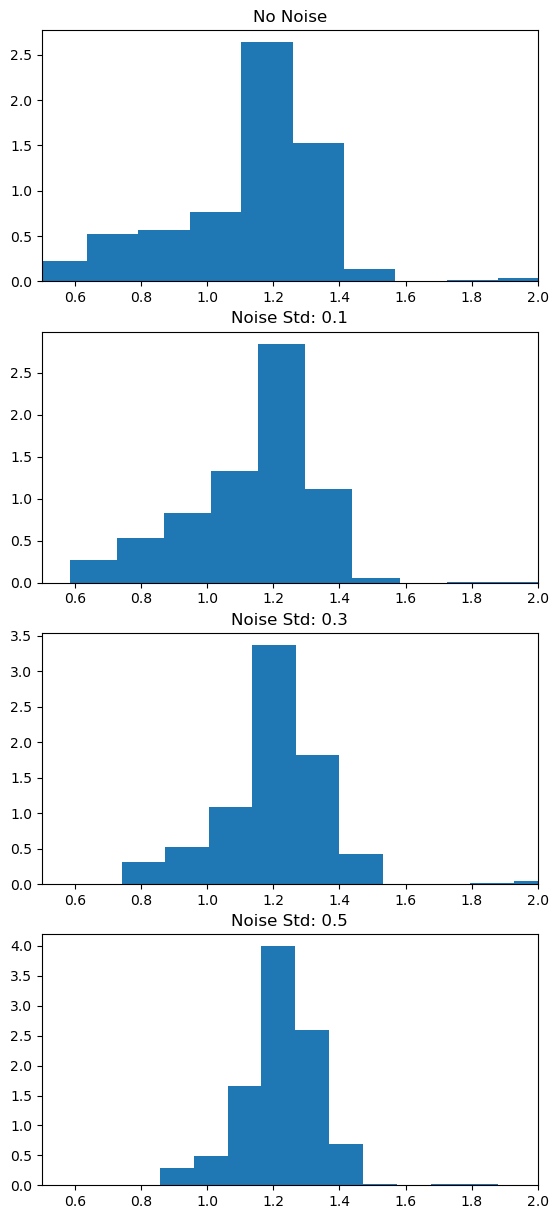

In [126]:
noNoise = results[results["noise layer std"] == "0.0"].RMSE
wNoise1 = results[results["noise layer std"] == "0.1"].RMSE
wNoise3 = results[results["noise layer std"] == "0.3"].RMSE
wNoise5 = results[results["noise layer std"] == "0.5"].RMSE



fig, ax = plt.subplots(4)
fig.set_figheight(15)

ax[0].hist(noNoise, density=True)
ax[0].title.set_text("No Noise")
ax[1].hist(wNoise1, density = True)
ax[1].title.set_text("Noise Std: 0.1")
ax[2].hist(wNoise3, density =True)
ax[2].title.set_text("Noise Std: 0.3")
ax[3].hist(wNoise5, density =True)
ax[3].title.set_text("Noise Std: 0.5")
plt.setp(ax, xlim=[0.5, 2.0])


In [127]:
print("The mean of noNoise = " + str(noNoise.mean()))
print("The mean of wNoise1 = " + str(wNoise1.mean()))
print("The mean of wNoise3 = " + str(wNoise3.mean()))
print("The mean of wNoise5 = " + str(wNoise5.mean()))
print("")
print("The median of noNoise = " + str(noNoise.median()))
print("The median of wNoise1 = " + str(wNoise1.median()))
print("The median of wNoise3 = " + str(wNoise3.median()))
print("The median of wNoise5 = " + str(wNoise5.median()))
print("")
print("The std of noNoise = " + str(noNoise.std()))
print("The std of wNoise1 = " + str(wNoise1.std()))
print("The std of wNoise3 = " + str(wNoise3.std()))
print("The std of wNoise5 = " + str(wNoise5.std()))

The mean of noNoise = 1.1244963723370152
The mean of wNoise1 = 1.1335187300747516
The mean of wNoise3 = 1.1992204716572394
The mean of wNoise5 = 1.2208780478121657

The median of noNoise = 1.1760139465332031
The median of wNoise1 = 1.1797495484352112
The median of wNoise3 = 1.201080858707428
The median of wNoise5 = 1.2187584042549133

The std of noNoise = 0.2257062657072236
The std of wNoise1 = 0.19086167412706725
The std of wNoise3 = 0.16047606488216584
The std of wNoise5 = 0.11675048351541194


# Question 4: Residual layer of user information

At first glance there is also nothing of statistical significance


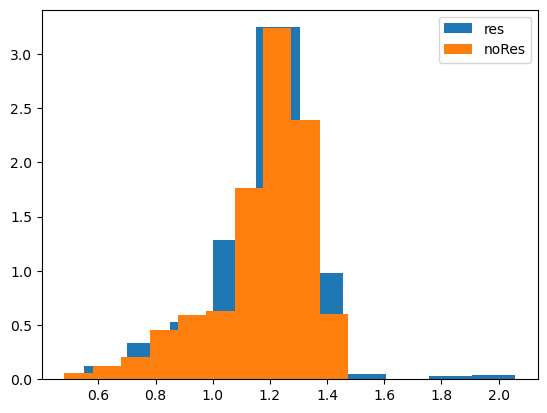

In [128]:
res = results[results["residual user info"] == "True"].RMSE
noRes = results[results["residual user info"] == "False"].RMSE
plt.hist(res, density = True)
plt.hist(noRes, density = True)
plt.legend(['res', 'noRes'])

In [129]:
print("The mean of res = " + str(res.mean()))
print("The mean of noRes = " + str(noRes.mean()))
print("The median of res = " + str(res.median()))
print("The median of noRes = " + str(noRes.median()))
print("The std of res = " + str(res.std()))
print("The std of noRes = " + str(noRes.std()))

The mean of res = 1.16395132510475
The mean of noRes = 1.1767857422634047
The median of res = 1.1861570477485657
The median of noRes = 1.21305912733078
The std of res = 0.18389705641249857
The std of noRes = 0.17878702593038484


# Question 5: Loss Function
Actually highly statistically significant

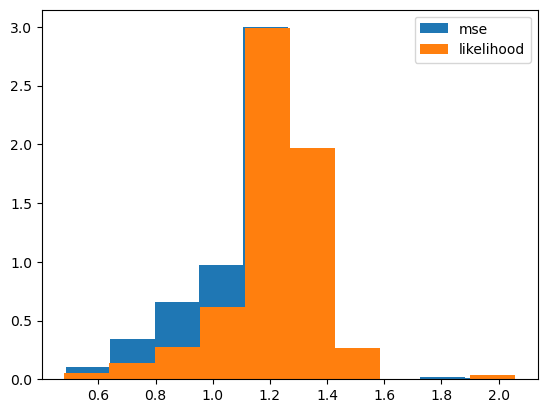

In [130]:
mse = results[results["Recon Loss"] == "MSE"].RMSE
likelihood = results[results["Recon Loss"] == "Likelihood"].RMSE
plt.hist(mse, density = True)
plt.hist(likelihood, density = True)
plt.legend(['mse', 'likelihood'])

In [131]:
print("The mean of mse = " + str(mse.mean()))
print("The mean of likelihood = " + str(likelihood.mean()))
print("The median of mse = " + str(mse.median()))
print("The median of likelihood = " + str(likelihood.median()))

The mean of mse = 1.13152446206114
The mean of likelihood = 1.2094537378023795
The median of mse = 1.1741338968276978
The median of likelihood = 1.22096586227417


In [132]:
stats.ttest_ind(mse, likelihood, equal_var = False, alternative = "less")

Ttest_indResult(statistic=-9.774612930608779, pvalue=2.290427207383155e-22)

0.1866874371110586